In [1]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
stop_word_dict = {}
file_path = "stopwords/en/"
for stop_word_file in os.listdir(file_path):
    # _none.txt doesn't contain any stop word
    if stop_word_file == "_none.txt":
        continue
    # these files contain ngrams, not just single words
    if stop_word_file in ["galago_structured.txt", "gilner_morales.txt"]:
        continue
    # This is meant to augment another list, and so is confusing here
    if stop_word_file == "galago_forumstop.txt":
        continue
    input_file = open(file_path + stop_word_file, encoding='UTF-8')
    stop_words = input_file.readlines()
    input_file.close()
    stop_words = list(map(lambda x:x.strip().lower(), stop_words))
    stop_words = list(filter(lambda x:len(x) > 0, stop_words))
    stop_words = list(filter(lambda x:x[0] >= 'a' and x[0] <= 'z', stop_words))
    # there are some duplicate stop words
    stop_words = list(set(stop_words))
    # calculate frequency
    for stop_word in stop_words:
        stop_word_dict[stop_word] = stop_word_dict.get(stop_word, 0) + 1
print("number of stop word lists : %d" %(len(os.listdir(file_path)) - 4))
print("number of stop words in all the lists : %d" %(len(stop_word_dict.keys())))

number of stop word lists : 52
number of stop words in all the lists : 2066


In [3]:
freq_df = pd.DataFrame({"word":list(stop_word_dict.keys()), "freq":list(stop_word_dict.values())})
freq_df["percentage"] = freq_df["freq"] / 52

In [4]:
controversial_word = list(freq_df[freq_df.percentage < 0.1]['word'])
print("number of stop words included in <10%% lists : %d; percentage : %.2f%%"
      %(len(controversial_word), len(controversial_word) * 100 / freq_df.shape[0]))
word_in_one_list = list(freq_df[freq_df.freq == 1]['word'])
print("number of stop words included in 1 list : %d; percentage : %.2f%%"
      %(len(word_in_one_list), len(word_in_one_list) * 100 / freq_df.shape[0]))
accpeted_word = list(freq_df[freq_df.percentage > 0.8]['word'])
print("number of stop words included in >80%% lists : %d; percentage : %.2f%%"
      %(len(accpeted_word), len(accpeted_word) * 100 / freq_df.shape[0]))

number of stop words included in <10% lists : 1396; percentage : 67.57%
number of stop words included in 1 list : 807; percentage : 39.06%
number of stop words included in >80% lists : 64; percentage : 3.10%


In [5]:
stop_word_dict = {}
file_path = "stopwords/en/"
controversial_list_cnt = 0
for stop_word_file in os.listdir(file_path):
    # _none.txt doesn't contain any stop word
    if stop_word_file == "_none.txt":
        continue
    # these files contain ngrams, not just single words
    if stop_word_file in ["galago_structured.txt", "gilner_morales.txt"]:
        continue
    # This is meant to augment another list, and so is confusing here
    if stop_word_file == "galago_forumstop.txt":
        continue
    input_file = open(file_path + stop_word_file, encoding='UTF-8')
    stop_words = input_file.readlines()
    input_file.close()
    stop_words = list(map(lambda x:x.strip().lower(), stop_words))
    stop_words = list(filter(lambda x:len(x) > 0, stop_words))
    stop_words = list(filter(lambda x:x[0] >= 'a' and x[0] <= 'z', stop_words))
    # there are some duplicate stop words
    stop_words = list(set(stop_words))
    # calculate frequency
    for word in stop_words:
        if word in controversial_word:
            controversial_list_cnt += 1
            break
print("number of stop lists with controversial words : ", controversial_list_cnt)

number of stop lists with controversial words :  45


In [6]:
df = pd.read_csv("google_1gram_cnt.csv")

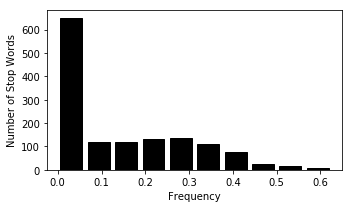

In [7]:
controversial_words = df[df.percentage < 0.10]
plt.figure(figsize=(5, 3))
plt.hist(controversial_words['df'], rwidth=0.8, edgecolor='black', facecolor="black")
plt.xlabel("Frequency")
plt.ylabel("Number of Stop Words")
plt.tight_layout()
plt.savefig("figures/google_document_frequency.png", dpi=300, bbox_inches='tight')
plt.show()

In [8]:
controversial_words[controversial_words.df > 0.5]

,word,freq,percentage,match_count,volume_count,df
238,book,3,0.057692,122339388.0,7471834.0,0.575511
368,day,5,0.096154,235502808.0,7149547.0,0.550688
455,early,5,0.096154,131494753.0,6962309.0,0.536266
570,finally,2,0.038462,62381205.0,6909353.0,0.532187
608,free,1,0.019231,103078911.0,6511494.0,0.501542
633,general,2,0.038462,225306151.0,8088215.0,0.622988
657,great,3,0.057692,278574742.0,8087649.0,0.622944
762,house,1,0.019231,158321573.0,6886583.0,0.530433
847,introduction,1,0.019231,37676373.0,6642548.0,0.511636
936,life,2,0.038462,303632580.0,7894850.0,0.608094
